# Regresión lineal

Realizaremos una regresión lineal sobre datos de ''Boston house prices''. En este caso, el dataset está conformado por vectores  en $\mathbb{R}^13$ asociados a un valor en $\mathbb{R}$. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
import pandas as pd

### Preparación de los datos

En primer lugar, cargamos el dataset. Para visualizar mejor el dataset, utilizamos pandas.

In [2]:
#Carga dataset
data = load_boston()
#Visualiza variables
print(data.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [3]:
#Formato de pandas
table_data = pd.DataFrame(data.data, columns=data.feature_names)
#Agregamos la clase a la tabla
table_data['Y'] = data.target

Una descripción del dataset se da a continuación a partir del comando `.DESCR`.

In [4]:
#Información del dataset
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Con la tabla de pandas que hemos creado, podemos definir una correlación entre las variables. Ya que buscamos establecer una regresión lineal, los elementos que muestren una mayor correlación con la variable $Y$ (precio) serán los que nos servirán mejor.  

La correlación se estima como:

$$\rho(X,Y) = \frac{Cov(X,Y)}{\sigma_X \sigma_Y}$$

In [5]:
#Correlaciones lineales
table_data.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Y
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


La variable $RM$ (número promedio de cuartos) muestra una correlación positiva alta, por tanto, puede servirnos para realizar la correlación lineal. Tomaremos, entonces, esta variable como nuestra variable de entrada. 

In [6]:
#X
X_RM = table_data[['RM']].to_numpy()
#Y
Y = data.target

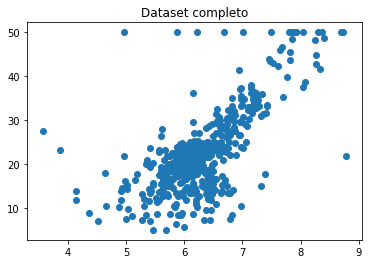

In [7]:
#Visualización
plt.scatter(X_RM, Y)
plt.title('Dataset completo')
plt.show()

A continuación separaremos los datos en entrenamiento (70\%) y evaluación (30%).

In [8]:
#Separación de los datos
X_train, X_test, Y_train, Y_test = train_test_split(X_RM,Y, test_size=0.3)
#Longitud de entrenamiento
print(len(X_train))
#Longitud de evaluación
print(len(X_test))

354
152


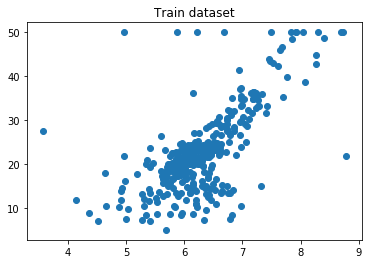

In [9]:
#Visualización datos de entrenamiento
plt.scatter(X_train,Y_train)
plt.title('Train dataset')
plt.show()

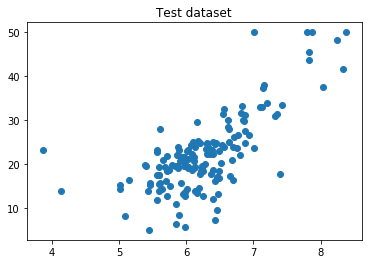

In [10]:
#Visualización datos de evaluación
plt.scatter(X_test,Y_test)
plt.title('Test dataset')
plt.show()

## Estimación de la regresión

Recordemos que un método de regresión lineal está definido por una familia de funciones de la forma:

$$f(x) = wx+b$$

Para estimar los parámetros que mejor describan nuestros datos, bastará enontrar el mínimo de la función:

$$R(w) = \frac{1}{2} ||f(X) - Y||^2$$

El mínimo de esta función se puede estimar obteniendo la derivada de la función e igualando a cero. La derivada de la función está dada por:

\begin{align}
    \nabla_w R(w) &= (f(X) - Y)X \\
                  &= (Xw - Y)X \\
                  &= X^TXw-X^TY
\end{align}

De aquí que, cuando $\nabla_w R(w) = 0$, entonces:

$$w = (X^T X)^{-1}X^TY$$

Nota: Para simplificar el método, agreamos una columna con 1's a los datos de entrada, de tal forma que $x' = [x;1]$. este 1 servirá para representar el bias, de tal forma que la función $f(x) = wx'$; es decir, el bias será una entrada (la última) del vector w.

In [11]:
#Se concatena una columna de 1's a X
Xb = np.concatenate((X_train, np.ones((len(X_train),1))), axis=1)
print(Xb.shape)

(354, 2)


Obtenemos el vector $w$ (este vector incluye el bias).

In [13]:
#XX^-1 
term1 = np.linalg.inv(np.dot(Xb.T,Xb))
#XY
term2 = np.dot(Xb.T,Y_train)

#Vector solución
w = np.dot(term1,term2)

La recta que se ajusta los datos está definida por la función $f(x)$ que depende de $w$. Por tanto, podemos visualizar qué tanto esta recta se ajusta a los datos. En este caso, visualizamos tanto con los datos de entrenamiento como con los de evaluación, pero debe recordarse que la evaluación del modelo de regresión sólo debe realizarse sobre datos que no se vieron en el entrenamiento.

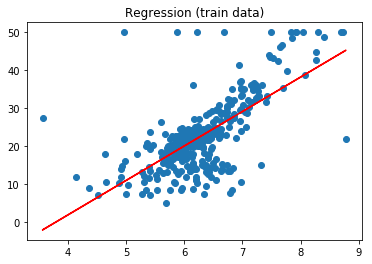

In [14]:
#Visualización en datos de entrenamieno
plt.scatter(X_train, Y_train)
plt.plot(X_train, np.dot(Xb,w), color='r')
plt.title('Regression (train data)')
plt.show()

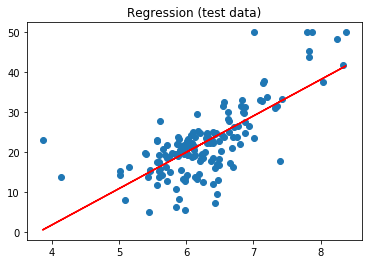

In [15]:
#Visualización en datos de evaluación
plt.scatter(X_test, Y_test)
plt.plot(X_test, np.dot(X_test,w[0])+w[1], color='r')
plt.title('Regression (test data)')
plt.show()

Finalmente, podemos ver cómo se comporta el error a través del dataset de entrenamiento y de evaluación. El error que nos interesa reportar (para determinar la capacidad de generalización de nuestro modelo) es el error de evaluación.

In [16]:
#Error de entrenamiento
print('Error train:', np.linalg.norm(X_train-np.dot(Xb,w))**2/len(X_train))
#Error de evaluación
print('Error test:', np.linalg.norm(X_test-(np.dot(X_test,w[0])+w[1]))**2/len(X_test))

Error train: 109407.38241857088
Error test: 293.03460782034506


### Distribución estadística

La regresión lineal asume una distribución normal. Por tanto, podemos ver el problema de regresión como un caso particular de un problema de aprendizaje definido por la función:

$$R(q) = -\mathbb{E}_{Y\sim p} \ln q(x)$$

Ya que la distribución es normal, se  tienen los parámetros de media  y varianza. Generalmente se asume que la varianza es 1.

In [17]:
#Media empírica de Y
mu = Y.sum(0)/len(Y)
sigma = 1 #((Y-mu)**2).sum(0)/len(Y)

print(mu,sigma, w)

22.532806324110677 1 [  9.08784664 -34.52903783]


In [18]:
#Distribución empírica de Y
a = (1./np.sqrt(sigma*2*np.pi))*np.exp(-(Y-mu)**2/sigma)

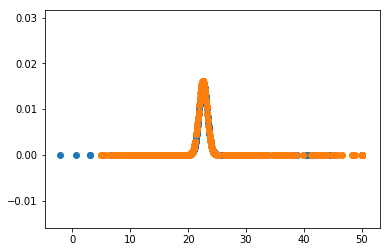

In [27]:
#f(X)
y_hat = (w[0]*X_RM[:,0] + w[1])
#Media empírica de f(X)
mu_hat = y_hat.sum(0)/len(y_hat)
sigma_hat = 1 #((y_hat-mu_hat)**2).sum(0)/len(y_hat)

#Distribución empírica de f(X)
e = (1./np.sqrt(sigma_hat*2*np.pi))*np.exp(-(mu_hat-y_hat)**2/sigma_hat)

#Visualización de distribuciones
plt.scatter(y_hat, e/e.sum(0))
plt.scatter(Y, a/a.sum(0))
plt.show()

Podemos, entonces determinar la entropía cruzada entre ambas distribuciones:

In [28]:
#Cross entropy
H = -(a*np.log(e)).sum(0)

print('Cross entropy:', H)

Cross entropy: 531.2489476136997


### Regresión lineal con múltiples variables

En el caso anterior sólo hemos tomado la variable $RM$ como variable de entrada en la regresión (esto permite visualizar la regresión en un plano 2-dimensional). Pero la regresión lineal puede estimarse tomando en cuenta $d$ varibales de entrada. Así, podemos tomar las 13 variables de los datos y ver cuáles son las que muestran mayor influencia en la decisión del precio.

In [30]:
#todos los datos
X_all = data.data

A partir de estos datos obtenemos los parámetros de la función lineal que mejor se ajusten de la forma ya conocida.

In [31]:
#Se agrega una columna de 1's
Xb = np.concatenate((X_all, np.ones((len(X_RM),1))), axis=1)

#Primer término
term1 = np.linalg.inv(np.dot(Xb.T,Xb))
#Segundo término
term2 = np.dot(Xb.T,Y)

#Obtención de parámetros
W = np.dot(term1,term2)

In [32]:
#Error sobre todo los datos
print('Error:', ((np.dot(Xb,W)-Y)**2).sum(0)/len(Y))

Error: 21.8948311817292


El vector $W$ que hemos estimado nos da información importante sobre el comportamiento de las variables de entrada. Aquellas variables con mayor correlación influirán más en la decisión del precio. Así, una variable con alta correlación positiva tenderá a tener un peso mayor (positivo), mientras que una variable con correlación negativa tendrá un peso con valor negativo.

In [33]:
pd.DataFrame(W.reshape(1,len(W)), columns=list(data.feature_names)+['bias'])

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,bias
0,-0.108011,0.04642,0.020559,2.686734,-17.766611,3.809865,0.000692,-1.475567,0.306049,-0.012335,-0.952747,0.009312,-0.524758,36.459488


Podemos visualizar algunas de estas variables para ver el comportamiento lineal que muestran con respecto a la variable $Y$.

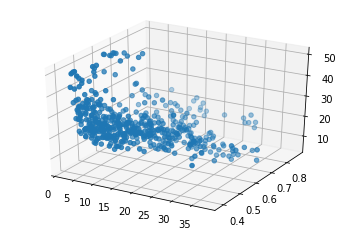

In [36]:
from mpl_toolkits.mplot3d import Axes3D

#Visualización de dos variables
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(table_data[['LSTAT']].to_numpy(), table_data[['NOX']].to_numpy(), Y)
plt.show()

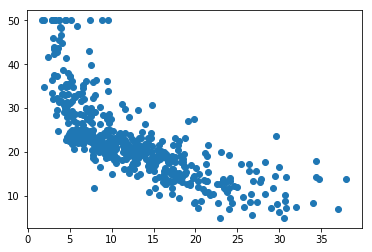

In [39]:
#Visualización de una variable
plt.scatter(table_data[['LSTAT']].to_numpy(), Y)
plt.show()